In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima

In [2]:
data = pd.read_excel(r"C:\Users\kriti\kriti python\Hourly Patient Data.xlsx")

In [3]:
data['Time'] = pd.to_datetime(data['Time'])
data['Date'] = data['Time'].dt.date
daily_totals = data.groupby('Date')['Total'].sum().reset_index()

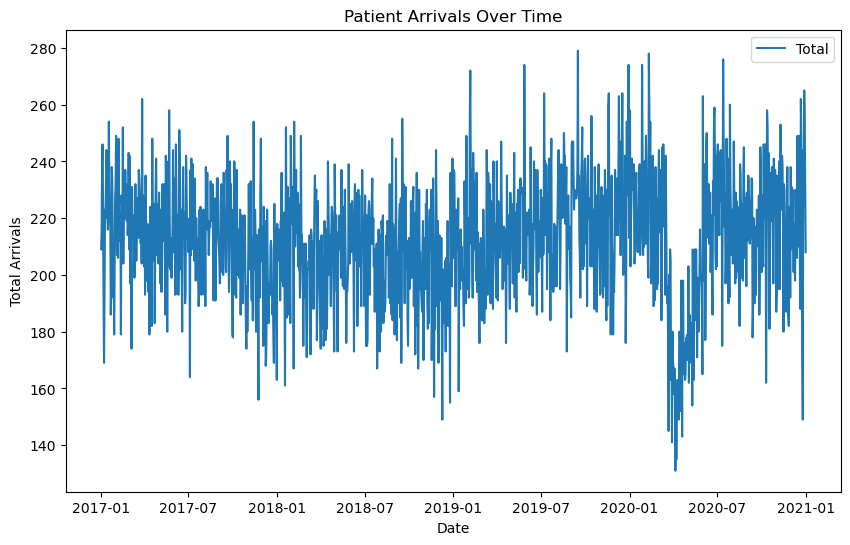

In [4]:
daily_totals.plot(x='Date', y='Total', figsize=(10, 6))
plt.title('Patient Arrivals Over Time')
plt.xlabel('Date')
plt.ylabel('Total Arrivals')
plt.show()

In [5]:
train_size = int(len(daily_totals) * 0.9)  
train, test = daily_totals.iloc[:train_size], daily_totals.iloc[train_size:]

In [6]:
model = auto_arima(train['Total'], seasonal=True, m=7,
                   start_p=1, start_q=1, start_P=1, start_Q=1,
                   max_p=5, max_q=5, max_P=5, max_Q=5,
                   d=None, D=None, trace=True, error_action='ignore', suppress_warnings=True)


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[7] intercept   : AIC=inf, Time=1.62 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=11779.015, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=11411.059, Time=1.13 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=11477.611, Time=0.52 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=17809.908, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=11617.594, Time=0.03 sec
 ARIMA(1,0,0)(2,0,0)[7] intercept   : AIC=11454.210, Time=5.54 sec
 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=11432.205, Time=1.40 sec
 ARIMA(1,0,0)(0,0,1)[7] intercept   : AIC=11465.576, Time=1.07 sec
 ARIMA(1,0,0)(2,0,1)[7] intercept   : AIC=13329.581, Time=1.67 sec
 ARIMA(0,0,0)(1,0,0)[7] intercept   : AIC=11443.744, Time=0.76 sec
 ARIMA(2,0,0)(1,0,0)[7] intercept   : AIC=11380.851, Time=2.04 sec
 ARIMA(2,0,0)(0,0,0)[7] intercept   : AIC=11608.281, Time=0.07 sec
 ARIMA(2,0,0)(2,0,0)[7] intercept   : AIC=12482.619, Time=6.41 sec
 ARIMA(2,0,0)(1,0,1)[7] i

In [7]:
model.fit(train['Total'])

ARIMA(order=(5, 0, 0), scoring_args={}, seasonal_order=(1, 0, 0, 7),
      suppress_warnings=True)

In [8]:
n_periods = len(test)
forecast_values = model.predict(n_periods=n_periods)

In [9]:
print("Forecasted values:")
print(forecast_values)

Forecasted values:
1314    221.715299
1315    215.592174
1316    211.566471
1317    211.772379
1318    225.855915
           ...    
1456    211.309112
1457    211.309112
1458    211.309112
1459    211.309112
1460    211.309112
Length: 147, dtype: float64


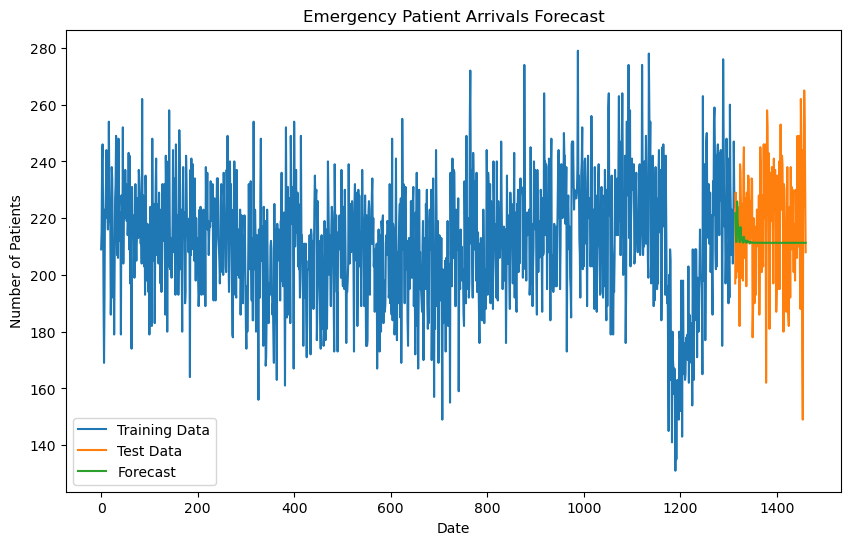

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Total'], label='Training Data')
plt.plot(test.index, test['Total'], label='Test Data')
plt.plot(test.index, forecast_values, label='Forecast')
plt.title('Emergency Patient Arrivals Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Patients')
plt.legend()
plt.show()

In [11]:
def mean_absolute_percentage_error(actual, forecast):
  
   
    actual, forecast = np.array(actual), np.array(forecast)
    return np.mean(np.abs((actual - forecast) / actual)) * 100

In [12]:
mape = mean_absolute_percentage_error(test['Total'], forecast_values)
print("MAPE:", mape)

MAPE: 8.133905304411197


In [13]:
def root_mean_squared_error(actual, forecast):
    
    actual, forecast = np.array(actual), np.array(forecast)
    return np.sqrt(np.mean((actual - forecast) ** 2))

In [14]:
rmse = root_mean_squared_error(test['Total'], forecast_values)
print("RMSE:", rmse)

RMSE: 21.597471100109047


In [15]:
import numpy as np

def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))


mae = mean_absolute_error(test['Total'], forecast_values)
print("MAE:", mae)

MAE: 17.699452745270598
